**Ensemble learning: using a random forest**


We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']


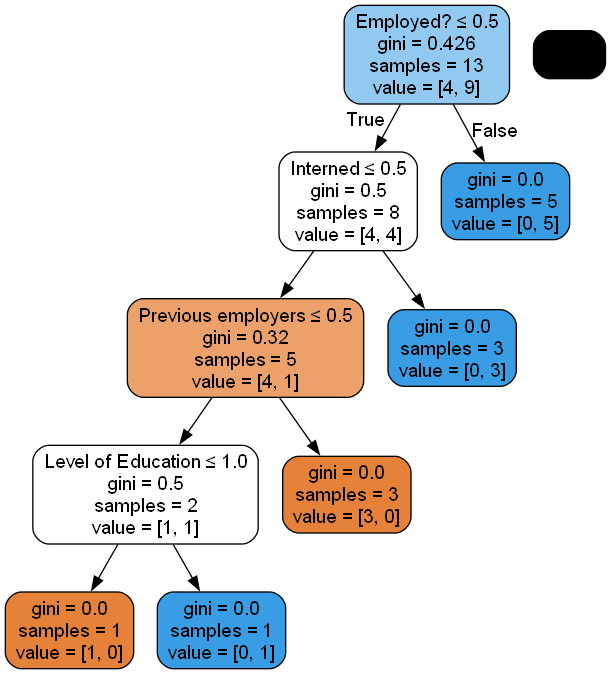

In [69]:
import numpy as np
import pandas as pd
from sklearn import tree
from IPython.display import Image  
from six import StringIO  
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

features = list(df.columns[:6])
print(features)

X = df[features]
y = df["Hired"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
# clf = clf.fit(X_train, y_train)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10) # n_estimators is equal to the number of trees
# clf = clf.fit(X, y)
clf = clf.fit(X_train, y_train)

# Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))

# ...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

# Predictions for the test set
predictions = clf.predict(X_test)
print(predictions)

[1]
[1]
[1 1 0]


c:\Users\ahmad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ahmad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [78]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [79]:
# Full code:
import numpy as np
import pandas as pd
from sklearn import tree
from IPython.display import Image  
from six import StringIO  
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

features = list(df.columns[:6])
print(features)

X = df[features]
y = df["Hired"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf_clf = RandomForestClassifier(n_estimators=10) # n_estimators is equal to the number of trees
# rf_clf = clf.fit(X, y)
rf_clf = clf.fit(X_train, y_train)

# Predictions for the test set
predictions = rf_clf.predict(X_test)
print(predictions)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']
[1 1 0]
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



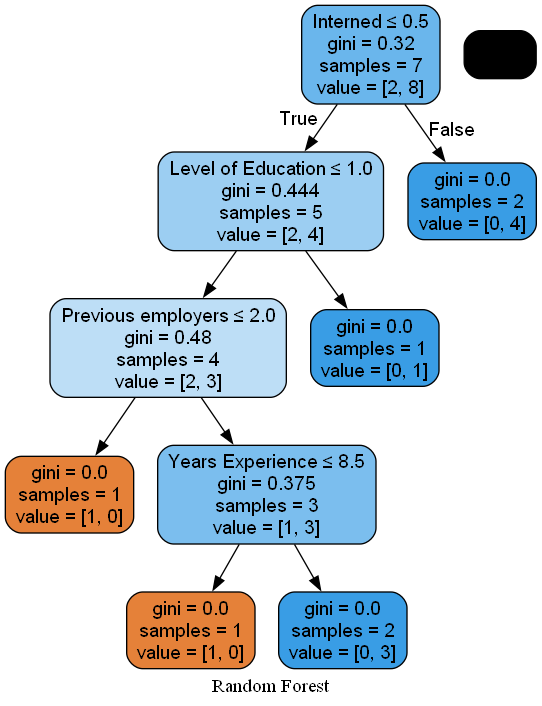

In [83]:
# Visualize one of the trees in the Random Forest (for example, the first tree)
# Note: You can choose a different tree index based on your requirements
tree_to_visualize = 1
tree_visualization_data = StringIO()
tree.export_graphviz(rf_clf.estimators_[tree_to_visualize], out_file=tree_visualization_data,
                     feature_names=features, filled=True, rounded=True, special_characters=True)

# tree_graph = pydotplus.graph_from_dot_data(tree_visualization_data.getvalue())

# Add a title to the PyDotPlus graph object
tree_graph = pydotplus.graph_from_dot_data(tree_visualization_data.getvalue())
tree_graph.set('label', 'Random Forest')

Image(tree_graph.create_png())

In [84]:
# Save the random forest tree visualization as a PNG file
output_file_path = "random_forest.png"
tree_graph.write_png(output_file_path)

True